# Лабораторная работа 5
## Метод сетод решения волнового уравнения
### Вариант 13

### Задача 1
Рассчитать колебания $u(x, t)$.
$$
\frac {\partial^2 u}{\partial t^2} - \frac{\rho}{E}\frac {\partial^2 u}{\partial x^2} = 0,\quad 0 \le x\le L 
$$

$$
u(0, t) = 0,\ u(L, t) = 0,\quad 0\le t \le T
$$

$$
u(x, 0) = - \frac{\rho}{E}\frac {\partial^2 u}{\partial x^2} 
$$

Для первого слоя имеем:
$$
u_j^0=p(x_j)
$$
Для второго:
$$
u_j^1 = u_j^0 + \tau \cdot \dfrac{du_j^0}{dt} + \dfrac {\tau^2}{2} \cdot \dfrac {d^2u_j^0}{dt^2} =p(x_j) + \tau \cdot q(x_j) +\dfrac {\tau^2}{2} \cdot  q(x_j)^n
$$
Для $i$-го:
$$
u_j^i = -u_j^{i-2} + \frac {E \cdot \tau^2}{\rho \cdot h^2} \cdot (u_{j+1}^{i-1} + u_{j-1}^{i-1}) + 2 u_j^{i-1} \cdot (1 - \cdot \frac {E \cdot \tau^2}{\rho \cdot h^2})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb

In [2]:
L       = 10
delta_u = 0.1
E       = 11e10
rho     = 4.3

Nx      = 50
h       = L / Nx
x_list  = np.linspace(0, L, Nx)

T       = 1
tau     = h/np.sqrt(E/rho)
Nt      = int(T/tau)

def f(x):
    return 0

def q(x):
    return 0

def p(x):
    return (-x**2 + 10*x) * delta_u/25

In [3]:
def task1():
    m = np.zeros((Nt, Nx))
    px = p(x_list)
    m[0][1:-1] = px[1:-1]
    m[1][1:-1] = px[1:-1] + tau * q(x_list[1:-1]) \
        + tau**2/2*(f(x_list[1:-1]) + px[2:] - 2*px[1:-1] + px[:-2])
    multiplier = E/rho*tau**2/h**2

    for i in range(2, Nt):
        m[i, 1:-1] = -m[i-2, 1:-1] + multiplier \
            * (m[i-1, 2:] + 2*m[i-1,1:-1]*(1 - 1/multiplier) + m[i-1,:-2])
    return m

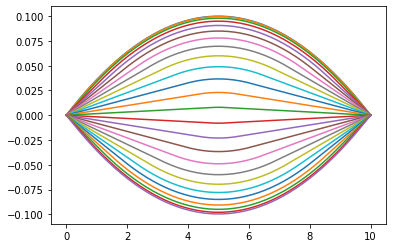

In [4]:
for line in task1()[:Nx:2]:
    pl.plot(x_list, line)
pl.show()

### Задача 2
Рассчитать колебания тонкой пластины
$$
\frac {\partial ^2u}{\partial t^2} - (\frac {\partial ^2u} {\partial x^2} + \frac {\partial ^2u}{\partial y^2}) = 0
$$
Заменим производные конечными разностями:

$$
\frac {u_{j, i}^{k+1} - 2 \cdot u_{j, i}^k + u_{j, i}^{k-1}}{\tau^2} - (
\frac {u_{i+1, j}^{k} - 2 \cdot u_{i, j}^k + u_{i-1, j}^k}{h_x^2} +
\frac {u_{i, j+1}^{k} - 2 \cdot u_{i, j}^k + u_{i, j-1}^k}{h_y^2}) = 0 \Rightarrow
$$

$$
\Rightarrow u_{j, i}^{k+1} = 2 \cdot u_{j, i}^{k} \cdot (1 - \tau^2(\frac{1}{h^2} - \frac{1}{h_y^2})) + (u_{j+1,i}^{k} + u_{j-1,i}^{k}) \cdot \frac{\tau^2}{h_y^2} + (u_{j,i+1}^{k} + u_{j, i-1}^{k}) \cdot \frac{\tau^2}{h^2} - u_{j, i}^{k-1}
$$

Аппроксимируем ГУ:
$$
u_{0, j}^k = u_{1, j}^k, \ u_{N_y, j}^k = u_{N_y-1, j}^k
$$

$$
u^1 = u^0 + \tau \cdot \frac {du}{dt} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} =
$$
$$ = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot (\frac {d^2u}{dx^2} + \frac {d^2u}{dy^2}) =  p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2}\cdot (\dfrac{p_{i+1,j} - 2\cdot p_{i,j} + p_{i-1,j}}{h^2} + \dfrac{p_{i,j+1} - 2\cdot p_{i,j} + p_{i,j-1}}{h_y^2})
$$

In [5]:
a = 1
b = 2

Nx = 30
Ny = 30

hx = a/Nx
hy = b/Ny

x = np.linspace(-a/2, a/2, Nx)
y = np.linspace(-b/2, b/2, Ny)

T   = 1
tau = hy*hx/np.sqrt(hy**2+hx**2)
Nt  = int(T/tau)

def u0(x, y):
    return np.arctan(np.cos(np.pi/a * x))

def phi(x, y):
    return np.sin((2*np.pi*x)/a) * np.sin((np.pi*y)/b)

In [6]:
def task2():
    m = np.zeros((Nx, Ny))
    u = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            u[i,j] = u0(x[i], y[j])
            m[i,j] = phi(x[i], y[j])
            
    
    h = np.zeros((Nt, Nx, Ny))
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            h[1,i,j] = u[i,j] + tau*m[i,j] \
                        + tau**2/2 *((u[i+1,j] - 2*u[i,j] + u[i-1,j])/hx**2 \
                                    +(u[i,j+1] - 2*u[i,j] + u[i,j-1])/hy**2)
    
    h[0,1:-1,:]  = u[1:-1]
    h[1,1:-1,0]  = h[1,1:-1,1]
    h[1,1:-1,-1] = h[1,1:-1,-2]
    
    tx = (tau/hx)**2
    ty = (tau/hy)**2
    for t in range(2, Nt):
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                h[t,i,j] = 2 *h[t-1,i,j] * (1-tx-ty) \
                            +(h[t-1,i,j+1] + h[t-1,i,j-1])*ty \
                                +tx*(h[t-1,i+1,j] + h[t-1,i-1,j]) - h[t-2,i,j]
            h[t,i,0]  = h[t,i,1]
            h[t,i,-1] = h[t,i,-2]
    return h

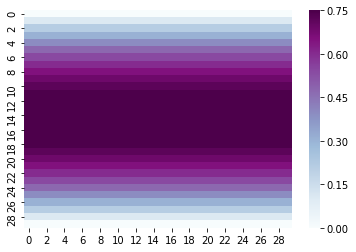

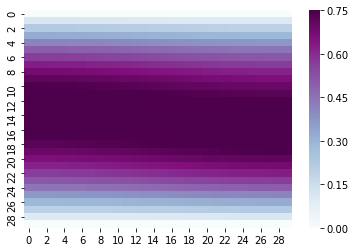

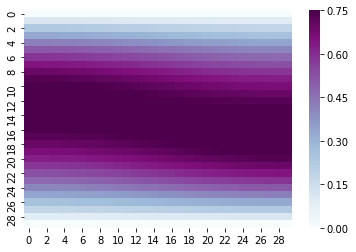

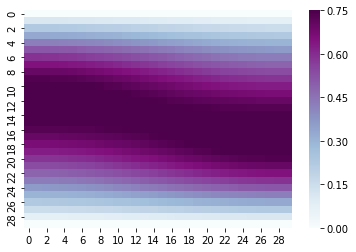

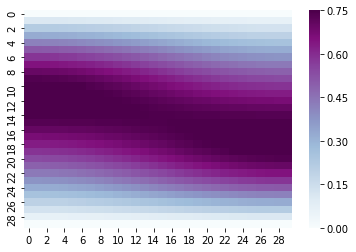

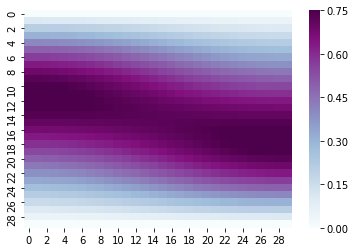

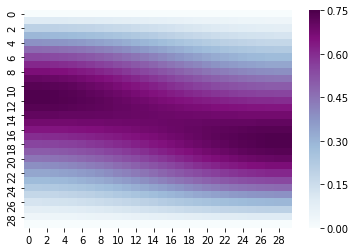

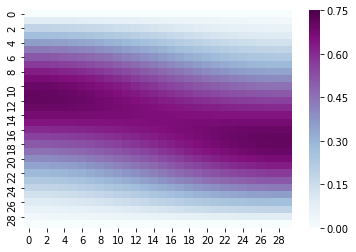

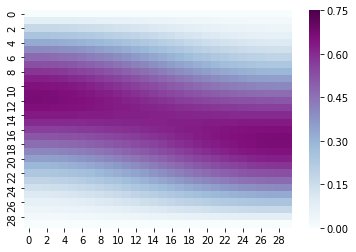

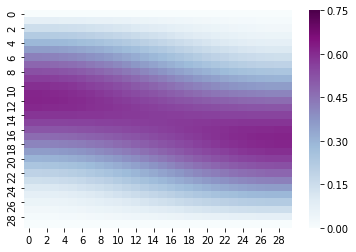

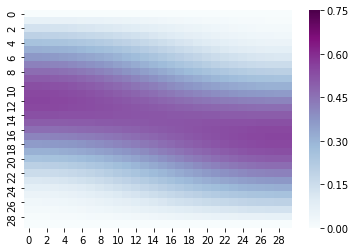

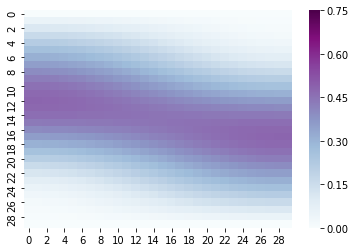

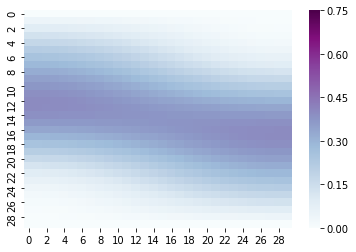

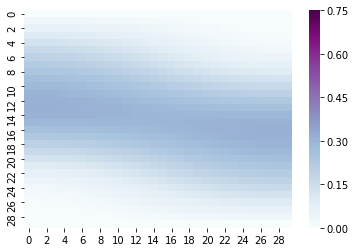

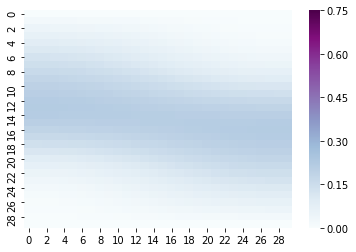

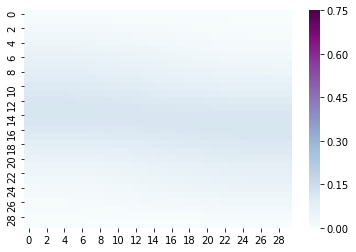

In [32]:
data = task2()
for matrix in data[:Nt//2:Nt//20]:
    sb.heatmap(matrix, cmap="BuPu", vmin=0, vmax=0.75)
    pl.show()